In [1]:
# libraries
from nilearn import datasets
from nilearn import image as nimg
from nilearn import plotting as nplot
import nibabel as nib
import numpy as  np
import numpy.linalg as npl
from pathlib import Path
%matplotlib inline
import os

In [ ]:
# download atlas
datasets.fetch_atlas_schaefer_2018(n_rois=100, yeo_networks=7, resolution_mm=2, data_dir=None, base_url=None, resume=True, verbose=1)

In [ ]:
# load atlas
os.chdir('/home/tdhore2/nilearn_data/schaefer_2018')
base_img = nib.load('Schaefer2018_400Parcels_17Networks_order_FSLMNI152_2mm.nii.gz')

/home/tdhore2/miniconda3/envs/hcp_env/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


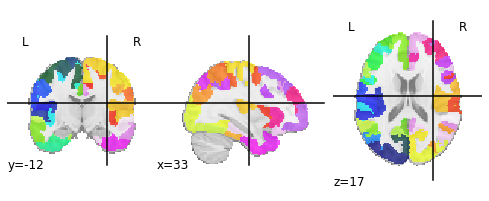

In [2]:
# plot atlas
y = nplot.plot_roi(base_img)

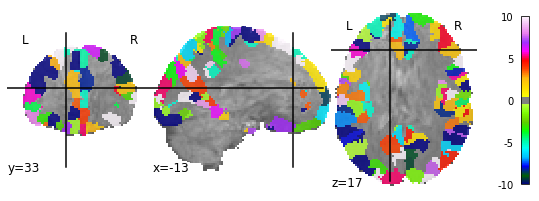

In [9]:
# view data in atlas
os.chdir('/data/hcp_working_folder/tdhore2/ts')
npzfile = np.load('ts_100206.npz')
scan = npzfile['LR1']
ag = scan.mean(axis=0)
avg = ag * 100000

arr = np.array(base_img.dataobj)
x = np.zeros((91, 109, 91))
for roi in range(0,399):
    coords = np.where(arr == (roi + 1))
    x[coords] = avg[roi]
nii_img = nib.Nifti1Image(x, affine=base_img.affine, header=base_img.header)
y = nplot.plot_roi(nii_img, img.slicer[:, :, :, 200], cut_coords = (-13, 33, 17), colorbar=True, alpha = 0.8, vmin=-10, vmax=10, black_bg=False, cbar_tick_format="%.2g")